# COVID-19 Forecasting - Predictive Data Analysis

The dataset for both machine learning and deep learning have been converted so that the index is the observation number, what means that it shows cases from various countries as a one period, thus being 25246 rows. 

Because of that we had more possible observations as input into the models. However, after applying the models to the data it is possible to change the plot horizontal axis to date time, which will be used in further stages when analysing the results. 

### Machine Learning Method - Polynomial Regression

In order to perform prediction using machine learning method, I have used polynomial regression, which is a form of a linear regression and a special 
case of multiple linear regression. Polynomial Regression is a reasonably simple method that tries to estimate the relationship between the independent and dependent variables as an nth degree polynomial. 

The con of this method is that it is highly sensitive to the outliers, however, it has been checked in the Data Cleaning and Preparation step that no outliers are present in out dataset, hence this method was possible to use. The dataset have been split into training and testing set with an 80/20 split, and scaled 
by using fit_transform() function so that it could be eligible for fitting the polynomial regression model. 

While fitting the model I have tried different configurations, that is using different variables as predictors, and trying different polynomial degree values for fitting the data. 

What turned out to be the best configuration is a model with polynomial degree of 2 as the model has generated the smallest values of Root Mean Squared Error (52.03), as well as Mean Absolute Error (29.68). 

Furthermore, since it has been noticed during performing Exploratory Data Analysis that the variable ‘new.d’ has higher correlation values with ‘new.c’, ‘new.r’ and ‘population’ variables, they have been used as predictors in 
the model.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from matplotlib.dates import date2num
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset (from a proper directory)
#df = pd.read_csv('/content/drive/MyDrive/Term2/CS5812/Files/Europe COVID statistics.csv', header = 0, parse_dates=["date"])
df = pd.read_csv('Europe COVID statistics.csv', header = 0, parse_dates = ["date"])

# Plot first few values
df.head()

,Unnamed: 0,X,country,iso3c,date,confirmed,deaths,recovered,new.d,new.c,new.r,population,death_rate,recovery_rate,infection_rate,continent
0,1513,1513,Albania,ALB,2020-01-22,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU
1,1514,1514,Albania,ALB,2020-01-23,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU
2,1515,1515,Albania,ALB,2020-01-24,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU
3,1516,1516,Albania,ALB,2020-01-25,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU
4,1517,1517,Albania,ALB,2020-01-26,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU


In [ ]:
# Show columns
df.columns

Index(['Unnamed: 0', 'X', 'country', 'iso3c', 'date', 'confirmed', 'deaths',
       'recovered', 'new.d', 'new.c', 'new.r', 'population', 'death_rate',
       'recovery_rate', 'infection_rate', 'continent'],
      dtype='object')

In [ ]:
# Data dimensions
df.shape

(25245, 16)

In [ ]:
# Get rid of the unnecessary columns
df = df.drop(columns = {"X", "continent", "Unnamed: 0", "iso3c"}) 

# Check the remaining columns
df.keys() 

Index(['country', 'date', 'confirmed', 'deaths', 'recovered', 'new.d', 'new.c',
       'new.r', 'population', 'death_rate', 'recovery_rate', 'infection_rate'],
      dtype='object')

In [ ]:
df.tail()

,country,date,confirmed,deaths,recovered,new.d,new.c,new.r,population,death_rate,recovery_rate,infection_rate
25240,Holy See,2021-07-31,27,0,27,0,0,0,809,0.0,0.0,0.0
25241,Holy See,2021-08-01,27,0,27,0,0,0,809,0.0,0.0,0.0
25242,Holy See,2021-08-02,27,0,27,0,0,0,809,0.0,0.0,0.0
25243,Holy See,2021-08-03,27,0,27,0,0,0,809,0.0,0.0,0.0
25244,Holy See,2021-08-04,27,0,27,0,0,0,809,0.0,0.0,0.0


In [ ]:
# Sorting the values by the date (eventual, does not have to be applied)
#df2 = df
#df2 = df2.sort_values("date")
#df2

#df3 = df2.iloc[-5048:,]
#df3 = pd.DataFrame(df3)
#df3

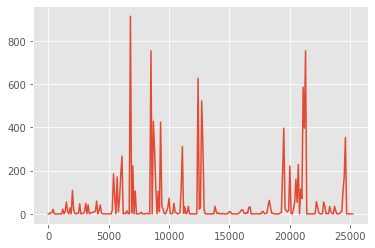

In [ ]:
# Plot new daily deaths across Europe with respect to cases
plt.style.use('ggplot')
newd = df['new.d'] # data frame containing only new daily deaths
newd[::100].plot()

In [ ]:
newd.describe()

count    25245.000000
mean        45.210814
std        125.863878
min          0.000000
25%          0.000000
50%          3.000000
75%         22.000000
max       1826.000000
Name: new.d, dtype: float64

In [ ]:
# Get the data for the model

X = df.loc[:, ['new.c', 'new.r', 'population']] # variables that are correlated the most with new.d
y = df.loc[:, 'new.d']

X.shape, y.shape

((25245, 3), (25245,))

In [ ]:
# Label encoding
label = LabelEncoder()

In [ ]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20196, 3), (5049, 3), (20196,), (5049,))

In [ ]:
# Apply polynomial regression model
poly = PolynomialFeatures(degree = 2)

# Transform the data
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

# Fit the model
poly.fit(X_poly_train, y_train)
ml_model = LinearRegression()

ml_model.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# Creating a data frame of test predictions vs actuals
poly_pred = ml_model.predict(X_poly_test)
ml_test_results = pd.DataFrame(data ={'Test Predictions': poly_pred, 'Actuals': y_test})
ml_test_results

,Test Predictions,Actuals
20196,29.651340,0
20197,29.651340,0
20198,29.651340,0
20199,29.651340,0
20200,29.651340,0
...,...,...
25240,-7.381114,0
25241,-7.381114,0
25242,-7.381114,0
25243,-7.381114,0


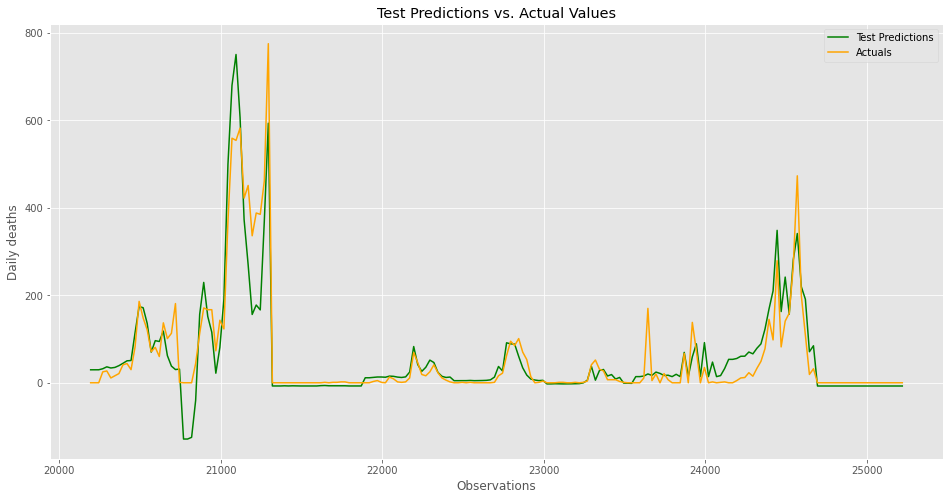

In [ ]:
# Plot test predictions
plt.subplots(figsize=(16,8))
plt.plot(ml_test_results['Test Predictions'][::25], color = "green")
plt.plot(ml_test_results['Actuals'][::25], color = "orange")
plt.title("Test Predictions vs. Actual Values")
plt.xlabel("Observations")
plt.ylabel("Daily deaths")
plt.legend(ml_test_results)

In [ ]:
# ML Model Performance Evaluation 

score_ml = ml_model.score(X_poly_test, y_test)
mse_ml = metrics.mean_squared_error(poly_pred, y_test)
rmse_ml =  np.sqrt(metrics.mean_squared_error(poly_pred, y_test))
mae_ml = metrics.mean_absolute_error(poly_pred, y_test)
r2_ml = metrics.r2_score(poly_pred, y_test)

In [ ]:
print("Polynomial Regression Metrics:\n")
print("ML model score: ", score_ml)
print("Mean Squared Error (MSE):", mse_ml)
print("Root Mean Squared Error (RMSE): ", rmse_ml)
print("Mean Absolute Error (MAE): ", mae_ml)
print("R-squared: ", r2_ml)

Polynomial Regression Metrics:

ML model score:  0.8180216509701543
Mean Squared Error (MSE): 2709.5223763164804
Root Mean Squared Error (RMSE):  52.05307268852128
Mean Absolute Error (MAE):  29.68472406736372
R-squared:  0.8107386193588995


## Deep Learning Method - LSTM

I decided to use Long Short-Term Memory (LSTM) network model for future daily deaths prediction. LSTM model is a specific type of Recurrent Neural Network (RNN) that consist of a cell and 3 gates (forget gate, input gate and output gate), where the cell remembers values over certain time intervals, and the gates regulate how the information flows through them. 

For the simplicity of the analysis, I performed univariate time series analysis, that means using only daily deaths from previous days to 
predict new ones. The first step that needed to be done before creating a model is extracting the ’new.d’ variable from the dataset and converting it into a tensor, where the number of columns is the number of 
preceding days used, and third dimension is the network’s output shape. In my case, I have used 5 previous days to predict the next day, what means that the tensor with dimensions (25240, 5, 1) has been created. 

I tested few configurations with different amount of preceding days, although five days seemed to work reasonably well for my data. Next, the dataset has been split into training and testing set with a ratio of 80/20 and I have proceeded to implement a model using TensorFlow library. 

The structure of the network is an input layer, two hidden layers, and an output layer. Adam optimizer has been used to compile the model, with a learning rate of 0.0001, along with a Mean Squared Error metric as a measure 
of loss and Root Mean Squared Error being tracked in every epoch. For training the model, the number of epochs has been chosen analytically by trying different configurations, which resulted in 50 epochs being chosen in the end for fitting. 

During the model learning process, first iterations had huge validated loss and root mean squared error values, but as the learning progressed it started to decrease rapidly. 


In [ ]:
# Import necessary libraries
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint # for saving models (the one that does best on the validation)
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data set
#df = pd.read_csv('/content/drive/MyDrive/Term2/CS5812/Files/Europe COVID statistics.csv', header = 0, parse_dates = ["date"])
df = pd.read_csv('Europe COVID statistics.csv', header = 0, parse_dates = ["date"])

In [ ]:
# Drop unnrcessary columns 
df = df.drop(columns = {"X", "continent", "Unnamed: 0", "iso3c"}) 

# Show first few rows
df.head()

,country,date,confirmed,deaths,recovered,new.d,new.c,new.r,population,death_rate,recovery_rate,infection_rate
0,Albania,2020-01-22,0,0,0,0,0,0,2877800,0.0,0.0,0.0
1,Albania,2020-01-23,0,0,0,0,0,0,2877800,0.0,0.0,0.0
2,Albania,2020-01-24,0,0,0,0,0,0,2877800,0.0,0.0,0.0
3,Albania,2020-01-25,0,0,0,0,0,0,2877800,0.0,0.0,0.0
4,Albania,2020-01-26,0,0,0,0,0,0,2877800,0.0,0.0,0.0


In [ ]:
df.columns

Index(['country', 'date', 'confirmed', 'deaths', 'recovered', 'new.d', 'new.c',
       'new.r', 'population', 'death_rate', 'recovery_rate', 'infection_rate'],
      dtype='object')

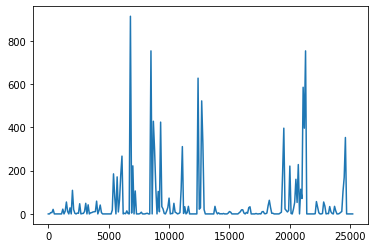

In [ ]:
# Show the new daily deaths cases
daily_d = df['new.d'] # data frame containing only new daily deaths
daily_d[::100].plot() # plot every 100th observation for more apparent visualisation

In [ ]:
# Set datetime as index
df.index = pd.to_datetime(df["date"], format = '%Y-%m-%d')
# Show few last rows
df.tail()

,country,date,confirmed,deaths,recovered,new.d,new.c,new.r,population,death_rate,recovery_rate,infection_rate
date,,,,,,,,,,,,
2021-07-31,Holy See,2021-07-31,27,0,27,0,0,0,809,0.0,0.0,0.0
2021-08-01,Holy See,2021-08-01,27,0,27,0,0,0,809,0.0,0.0,0.0
2021-08-02,Holy See,2021-08-02,27,0,27,0,0,0,809,0.0,0.0,0.0
2021-08-03,Holy See,2021-08-03,27,0,27,0,0,0,809,0.0,0.0,0.0
2021-08-04,Holy See,2021-08-04,27,0,27,0,0,0,809,0.0,0.0,0.0


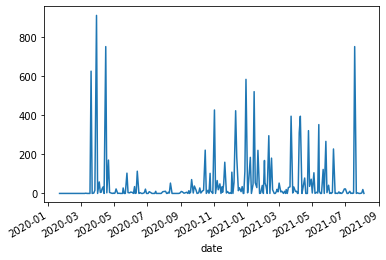

In [ ]:
# Plot new daily deaths across Europe over time 
newd = df['new.d'] # data frame containing only new daily deaths (as an input to be converted later on)
newd[::100].plot()

In [ ]:
# Summary of the data
newd.describe()

count    25245.000000
mean        45.210814
std        125.863878
min          0.000000
25%          0.000000
50%          3.000000
75%         22.000000
max       1826.000000
Name: new.d, dtype: float64

In [ ]:
# Define a function that converts the data into a tensor with previous observations

def df_to_X_y(df, window_size = 5):
  df_as_np = df.to_numpy()
  X = [] # starting as a list
  y = []
  # subtracting window size in order not to get out of bounds
  for i in range(len(df_as_np) - window_size): 
    # row is gonna be: whatever the a is, just take the next 5 values
    # it grabs each of this commented values (in the brackets) 
    row = [[a] for a in df_as_np[i : i + window_size]]
    
    # we need to grab this row thing
    X.append(row) 

    # label - y (actual true value for the input)
    # its gonna be the next value after the five values
    label = df_as_np[i + window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X, y = df_to_X_y(newd, WINDOW_SIZE) # feed daily deaths into the function
X.shape, y.shape # the fact that we're missing five values (25240) makes perfect sense here

((25240, 5, 1), (25240,))

In [ ]:
# Print the values of X

#X

In [ ]:
# Print the values of y

#y

In [ ]:
# Split the data into train set and test set (80/20)

#X_train_dl, y_train_dl = X[:20192], y[:20192]
#X_test_dl, y_test_dl = X[20192:], y[20192:]

# Split the data into training and testing set (80/20)
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y, test_size = 0.2, shuffle = False)

X_train_dl.shape, y_train_dl.shape, X_test_dl.shape, y_test_dl.shape

((20192, 5, 1), (20192,), (5048, 5, 1), (5048,))

In [ ]:
# Defining LSTM model

dl_model = Sequential()
dl_model.add(InputLayer((5,1))) # (5,1) - input shape
dl_model.add(LSTM(64)) # LSTM with 64 internal units  
dl_model.add(Dense(8, 'relu'))
dl_model.add(Dense(1, 'linear')) # linear cause we try to predict some value that's gonna be either positive or negative

dl_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Specify training callbacks:
cp = ModelCheckpoint('dl_model/', save_best_only = True) # save only the best model (one with the lowest validation loss)
dl_model.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.0001), metrics =[RootMeanSquaredError()]) 

In [ ]:
# Fit the model
dl_model.fit(X_train_dl, y_train_dl, validation_data = (X_test_dl, y_test_dl), epochs = 50, callbacks = [cp])

Epoch 1/50
626/631 [============================>.] - ETA: 0s - loss: 17409.4980 - root_mean_squared_error: 131.9451

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 63s 96ms/step - loss: 17427.9336 - root_mean_squared_error: 132.0149 - val_loss: 16879.3594 - val_root_mean_squared_error: 129.9206
Epoch 2/50
626/631 [============================>.] - ETA: 0s - loss: 16431.0684 - root_mean_squared_error: 128.1837

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 16335.2041 - root_mean_squared_error: 127.8092 - val_loss: 15345.7256 - val_root_mean_squared_error: 123.8779
Epoch 3/50
626/631 [============================>.] - ETA: 0s - loss: 15270.6211 - root_mean_squared_error: 123.5744

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 15290.8857 - root_mean_squared_error: 123.6563 - val_loss: 14047.8721 - val_root_mean_squared_error: 118.5237
Epoch 4/50
623/631 [============================>.] - ETA: 0s - loss: 14426.1865 - root_mean_squared_error: 120.1091

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 14347.5732 - root_mean_squared_error: 119.7814 - val_loss: 12804.0508 - val_root_mean_squared_error: 113.1550
Epoch 5/50
631/631 [==============================] - ETA: 0s - loss: 13434.5332 - root_mean_squared_error: 115.9074

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 13434.5332 - root_mean_squared_error: 115.9074 - val_loss: 11653.2539 - val_root_mean_squared_error: 107.9502
Epoch 6/50
624/631 [============================>.] - ETA: 0s - loss: 12648.1992 - root_mean_squared_error: 112.4642

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 12557.4072 - root_mean_squared_error: 112.0598 - val_loss: 10551.6826 - val_root_mean_squared_error: 102.7214
Epoch 7/50
629/631 [============================>.] - ETA: 0s - loss: 11735.0703 - root_mean_squared_error: 108.3285

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 10s 15ms/step - loss: 11719.7588 - root_mean_squared_error: 108.2578 - val_loss: 9529.1523 - val_root_mean_squared_error: 97.6174
Epoch 8/50
630/631 [============================>.] - ETA: 0s - loss: 10874.7002 - root_mean_squared_error: 104.2818

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 10919.2598 - root_mean_squared_error: 104.4953 - val_loss: 8573.6494 - val_root_mean_squared_error: 92.5940
Epoch 9/50
623/631 [============================>.] - ETA: 0s - loss: 10265.1875 - root_mean_squared_error: 101.3173

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 10167.4639 - root_mean_squared_error: 100.8338 - val_loss: 7694.2046 - val_root_mean_squared_error: 87.7166
Epoch 10/50
630/631 [============================>.] - ETA: 0s - loss: 9473.3359 - root_mean_squared_error: 97.3311

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 10s 16ms/step - loss: 9460.8574 - root_mean_squared_error: 97.2669 - val_loss: 6882.3687 - val_root_mean_squared_error: 82.9600
Epoch 11/50
629/631 [============================>.] - ETA: 0s - loss: 8824.3584 - root_mean_squared_error: 93.9381

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 8812.0859 - root_mean_squared_error: 93.8727 - val_loss: 6129.5317 - val_root_mean_squared_error: 78.2913
Epoch 12/50
625/631 [============================>.] - ETA: 0s - loss: 8282.8945 - root_mean_squared_error: 91.0104

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 8215.0898 - root_mean_squared_error: 90.6371 - val_loss: 5444.4297 - val_root_mean_squared_error: 73.7864
Epoch 13/50
627/631 [============================>.] - ETA: 0s - loss: 7605.1133 - root_mean_squared_error: 87.2073

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 7665.3335 - root_mean_squared_error: 87.5519 - val_loss: 4886.2949 - val_root_mean_squared_error: 69.9020
Epoch 14/50
626/631 [============================>.] - ETA: 0s - loss: 7194.8428 - root_mean_squared_error: 84.8224

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 15ms/step - loss: 7165.0820 - root_mean_squared_error: 84.6468 - val_loss: 4257.0654 - val_root_mean_squared_error: 65.2462
Epoch 15/50
623/631 [============================>.] - ETA: 0s - loss: 6732.0029 - root_mean_squared_error: 82.0488

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 15ms/step - loss: 6724.2549 - root_mean_squared_error: 82.0016 - val_loss: 3805.6277 - val_root_mean_squared_error: 61.6898
Epoch 16/50
628/631 [============================>.] - ETA: 0s - loss: 6356.9473 - root_mean_squared_error: 79.7305

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 6346.8149 - root_mean_squared_error: 79.6669 - val_loss: 3408.5864 - val_root_mean_squared_error: 58.3831
Epoch 17/50
622/631 [============================>.] - ETA: 0s - loss: 6020.3262 - root_mean_squared_error: 77.5908

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 5984.0532 - root_mean_squared_error: 77.3567 - val_loss: 2931.2559 - val_root_mean_squared_error: 54.1411
Epoch 18/50
629/631 [============================>.] - ETA: 0s - loss: 5640.1489 - root_mean_squared_error: 75.1009

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 10s 15ms/step - loss: 5644.6631 - root_mean_squared_error: 75.1310 - val_loss: 2621.3181 - val_root_mean_squared_error: 51.1988
Epoch 19/50
625/631 [============================>.] - ETA: 0s - loss: 5366.1758 - root_mean_squared_error: 73.2542

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 5323.7246 - root_mean_squared_error: 72.9639 - val_loss: 2324.6221 - val_root_mean_squared_error: 48.2143
Epoch 20/50
623/631 [============================>.] - ETA: 0s - loss: 5072.6631 - root_mean_squared_error: 71.2226

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 5097.9268 - root_mean_squared_error: 71.3998 - val_loss: 2279.8745 - val_root_mean_squared_error: 47.7480
Epoch 21/50
626/631 [============================>.] - ETA: 0s - loss: 4830.1104 - root_mean_squared_error: 69.4990

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 4813.0537 - root_mean_squared_error: 69.3762 - val_loss: 1963.4393 - val_root_mean_squared_error: 44.3107
Epoch 22/50
631/631 [==============================] - 4s 6ms/step - loss: 4571.0894 - root_mean_squared_error: 67.6098 - val_loss: 1999.3401 - val_root_mean_squared_error: 44.7140
Epoch 23/50
630/631 [============================>.] - ETA: 0s - loss: 4376.4736 - root_mean_squared_error: 66.1549

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 4381.2842 - root_mean_squared_error: 66.1913 - val_loss: 1870.5057 - val_root_mean_squared_error: 43.2493
Epoch 24/50
630/631 [============================>.] - ETA: 0s - loss: 4150.2588 - root_mean_squared_error: 64.4225

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 15ms/step - loss: 4172.7305 - root_mean_squared_error: 64.5967 - val_loss: 1612.1405 - val_root_mean_squared_error: 40.1515
Epoch 25/50
625/631 [============================>.] - ETA: 0s - loss: 3965.8452 - root_mean_squared_error: 62.9750

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 8s 13ms/step - loss: 3964.9539 - root_mean_squared_error: 62.9679 - val_loss: 1532.6986 - val_root_mean_squared_error: 39.1497
Epoch 26/50
626/631 [============================>.] - ETA: 0s - loss: 3832.7224 - root_mean_squared_error: 61.9090

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 3830.7729 - root_mean_squared_error: 61.8932 - val_loss: 1351.0006 - val_root_mean_squared_error: 36.7560
Epoch 27/50
631/631 [==============================] - 4s 6ms/step - loss: 3684.8962 - root_mean_squared_error: 60.7033 - val_loss: 1388.1180 - val_root_mean_squared_error: 37.2575
Epoch 28/50
630/631 [============================>.] - ETA: 0s - loss: 3644.8821 - root_mean_squared_error: 60.3729

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 8s 13ms/step - loss: 3646.9829 - root_mean_squared_error: 60.3903 - val_loss: 1268.9510 - val_root_mean_squared_error: 35.6223
Epoch 29/50
624/631 [============================>.] - ETA: 0s - loss: 3473.3506 - root_mean_squared_error: 58.9351

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 3444.7183 - root_mean_squared_error: 58.6917 - val_loss: 1243.8806 - val_root_mean_squared_error: 35.2687
Epoch 30/50
631/631 [==============================] - 4s 6ms/step - loss: 3390.8049 - root_mean_squared_error: 58.2306 - val_loss: 1297.6962 - val_root_mean_squared_error: 36.0236
Epoch 31/50
631/631 [==============================] - 4s 6ms/step - loss: 3273.7588 - root_mean_squared_error: 57.2168 - val_loss: 1315.1880 - val_root_mean_squared_error: 36.2655
Epoch 32/50
631/631 [==============================] - 4s 6ms/step - loss: 3177.9834 - root_mean_squared_error: 56.3736 - val_loss: 1852.7949 - val_root_mean_squared_error: 43.0441
Epoch 33/50
627/631 [============================>.] - ETA: 0s - loss: 3085.7729 - root_mean_squared_error: 55.5497

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 3072.0681 - root_mean_squared_error: 55.4262 - val_loss: 1136.8721 - val_root_mean_squared_error: 33.7175
Epoch 34/50
625/631 [============================>.] - ETA: 0s - loss: 3025.0872 - root_mean_squared_error: 55.0008

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 3029.9729 - root_mean_squared_error: 55.0452 - val_loss: 1101.9249 - val_root_mean_squared_error: 33.1953
Epoch 35/50
631/631 [==============================] - 4s 7ms/step - loss: 2994.5334 - root_mean_squared_error: 54.7223 - val_loss: 1164.3864 - val_root_mean_squared_error: 34.1231
Epoch 36/50
631/631 [==============================] - 4s 7ms/step - loss: 2871.6648 - root_mean_squared_error: 53.5879 - val_loss: 1774.6979 - val_root_mean_squared_error: 42.1272
Epoch 37/50
631/631 [==============================] - 4s 6ms/step - loss: 2868.5886 - root_mean_squared_error: 53.5592 - val_loss: 1173.7238 - val_root_mean_squared_error: 34.2597
Epoch 38/50
631/631 [==============================] - 4s 6ms/step - loss: 2799.4460 - root_mean_squared_error: 52.9098 - val_loss: 1194.8823 - val_root_mean_squared_error: 34.5671
Epoch 39/50
631/631 [==============================] - 4s 6ms/step - loss: 2873.5117 - root_mean_squared_e

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 2803.3438 - root_mean_squared_error: 52.9466 - val_loss: 1068.6656 - val_root_mean_squared_error: 32.6905
Epoch 41/50
631/631 [==============================] - 4s 6ms/step - loss: 2770.6382 - root_mean_squared_error: 52.6369 - val_loss: 1313.3463 - val_root_mean_squared_error: 36.2401
Epoch 42/50
628/631 [============================>.] - ETA: 0s - loss: 2716.3542 - root_mean_squared_error: 52.1187

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 2708.5906 - root_mean_squared_error: 52.0441 - val_loss: 1064.4562 - val_root_mean_squared_error: 32.6260
Epoch 43/50
631/631 [==============================] - 4s 6ms/step - loss: 2691.7517 - root_mean_squared_error: 51.8821 - val_loss: 1171.9440 - val_root_mean_squared_error: 34.2337
Epoch 44/50
631/631 [==============================] - 4s 6ms/step - loss: 2637.4414 - root_mean_squared_error: 51.3560 - val_loss: 1467.3527 - val_root_mean_squared_error: 38.3060
Epoch 45/50
624/631 [============================>.] - ETA: 0s - loss: 2669.4004 - root_mean_squared_error: 51.6662

INFO:tensorflow:Assets written to: dl_model/assets


INFO:tensorflow:Assets written to: dl_model/assets


631/631 [==============================] - 9s 14ms/step - loss: 2678.2886 - root_mean_squared_error: 51.7522 - val_loss: 1054.5664 - val_root_mean_squared_error: 32.4741
Epoch 46/50
631/631 [==============================] - 4s 6ms/step - loss: 2616.8572 - root_mean_squared_error: 51.1552 - val_loss: 1069.0686 - val_root_mean_squared_error: 32.6966
Epoch 47/50
631/631 [==============================] - 4s 7ms/step - loss: 2560.2434 - root_mean_squared_error: 50.5988 - val_loss: 1084.8187 - val_root_mean_squared_error: 32.9366
Epoch 48/50
631/631 [==============================] - 4s 6ms/step - loss: 2565.1777 - root_mean_squared_error: 50.6476 - val_loss: 1083.5365 - val_root_mean_squared_error: 32.9171
Epoch 49/50
631/631 [==============================] - 4s 6ms/step - loss: 2546.3262 - root_mean_squared_error: 50.4611 - val_loss: 1074.7181 - val_root_mean_squared_error: 32.7829
Epoch 50/50
631/631 [==============================] - 4s 6ms/step - loss: 2521.0239 - root_mean_squared_e

In [ ]:
# Load the best model
dl_model = load_model('dl_model/')

In [ ]:
# Creating a data frame of train predictions vs actuals
dl_train_pred = dl_model.predict(X_train_dl).flatten()
dl_train_results = pd.DataFrame(data ={'Train Predictions': dl_train_pred, 'Actuals': y_train_dl})
dl_train_results

,Train Predictions,Actuals
0,0.722355,0
1,0.722355,0
2,0.722355,0
3,0.722355,0
4,0.722355,0
...,...,...
20185,15.274243,8
20186,12.628034,9
20187,12.155589,19
20188,16.426119,15


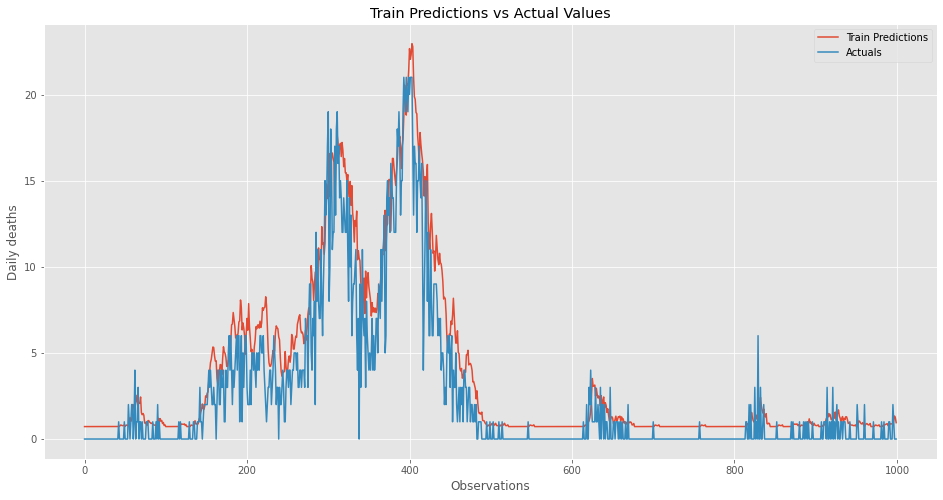

In [ ]:
# Plot train predictions vs actuals - first 1000 observations for closer fit investigation
plt.subplots(figsize = (16,8))
plt.plot(dl_train_results['Train Predictions'][:1000])
plt.plot(dl_train_results['Actuals'][:1000])
plt.title("Train Predictions vs Actual Values")
plt.xlabel("Observations")
plt.ylabel("Daily deaths")
plt.legend(dl_train_results)

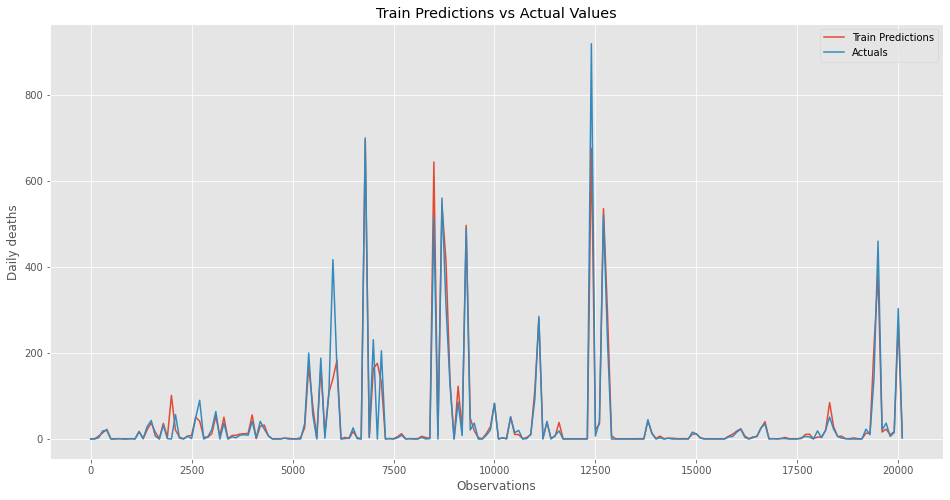

In [ ]:
# Train predictions vs actuals - plot every 100th case
plt.subplots(figsize = (16,8))
plt.plot(dl_train_results['Train Predictions'][::100])
plt.plot(dl_train_results['Actuals'][::100])
plt.title("Train Predictions vs Actual Values")
plt.xlabel("Observations (every 100th case)")
plt.ylabel("Daily deaths")
plt.legend(dl_train_results)

In [ ]:
# Creating a data frame of test predictions vs actuals
dl_pred = dl_model.predict(X_test_dl).flatten()
dl_results = pd.DataFrame(data = {'Test Predictions': dl_pred, 'Actuals': y_test_dl})
dl_results

,Test Predictions,Actuals
0,14.209697,0
1,18.973677,0
2,11.182781,0
3,4.725244,0
4,2.106681,0
...,...,...
5043,0.722355,0
5044,0.722355,0
5045,0.722355,0
5046,0.722355,0


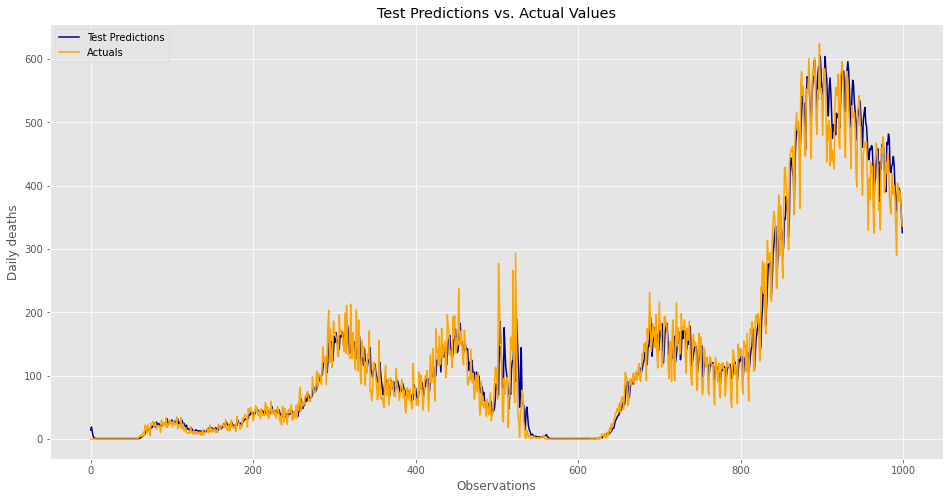

In [ ]:
# Plot test predictions - first 1000 observations for closer fit investigation
plt.subplots(figsize=(16,8))
plt.plot(dl_results['Test Predictions'][:1000], color = "darkblue")
plt.plot(dl_results['Actuals'][:1000], color = "orange")
plt.title("Test Predictions vs. Actual Values - first 1000 observations")
plt.xlabel("Observations")
plt.ylabel("Daily deaths")
plt.legend(dl_results)

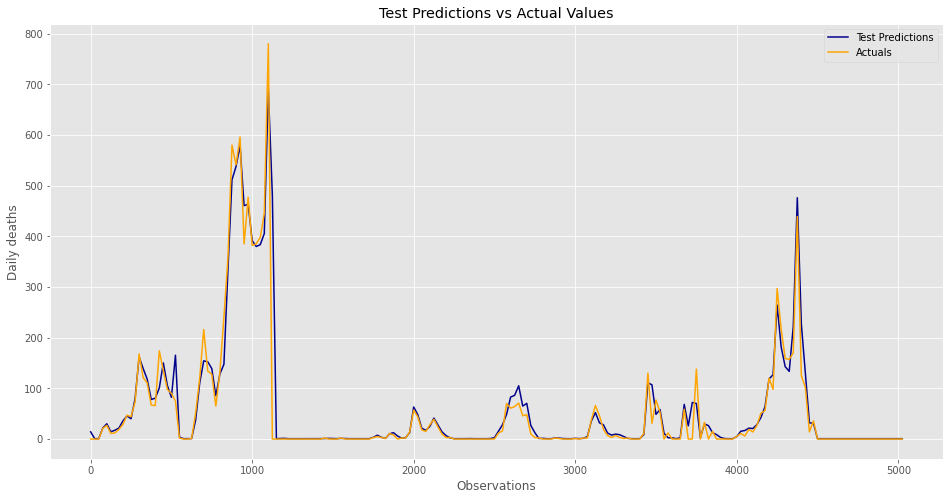

In [ ]:
# Test predictions vs actuals - plot every 25th case
plt.subplots(figsize = (16,8))
plt.plot(dl_results['Test Predictions'][::25], color = "darkblue")
plt.plot(dl_results['Actuals'][::25], color = "orange")
plt.title("Test Predictions vs Actual Values")
plt.xlabel("Observations (every 25th)")
plt.ylabel("Daily deaths")
plt.legend(dl_results)

In [ ]:
# Performance evaluation

mae_dl = metrics.mean_absolute_error(dl_pred, y_test_dl) # Mean Absolute Error
r2_dl = metrics.r2_score(dl_pred, y_test_dl) # R-squared
rmse_dl = np.sqrt(metrics.mean_squared_error(dl_pred, y_test_dl)) # Root Mean Squared Error

In [ ]:
print("Deep Learning Metrics - LSTM:\n")
dl_model.evaluate(X_test_dl, y_test_dl)
print("Mean Absolute Error: ", mae_dl)
print("R-squared: ", r2_dl)
print("Root Mean Squared Error: ", rmse_dl)

Deep Learning Metrics - LSTM:

158/158 [==============================] - 1s 3ms/step - loss: 1054.5664 - root_mean_squared_error: 32.4741
Mean Absolute Error:  11.460083727944767
R-squared:  0.9272531198388385
Root Mean Squared Error:  32.474093805985234


In [ ]:
#y_test.shape, y_test_dl.shape, poly_pred.shape, test_predictions.shape

In [ ]:
# Create a data frame with both models predictions

predictions = pd.DataFrame({'Actual': y_test[1:], "ML Prediction": poly_pred[1:], "DL Prediction": dl_pred})
predictions.head()

,Actual,ML Prediction,DL Prediction
20197,0,29.65134,14.209697
20198,0,29.65134,18.973677
20199,0,29.65134,11.182781
20200,0,29.65134,4.725244
20201,0,29.65134,2.106681


### ML & DL Methods Comparison

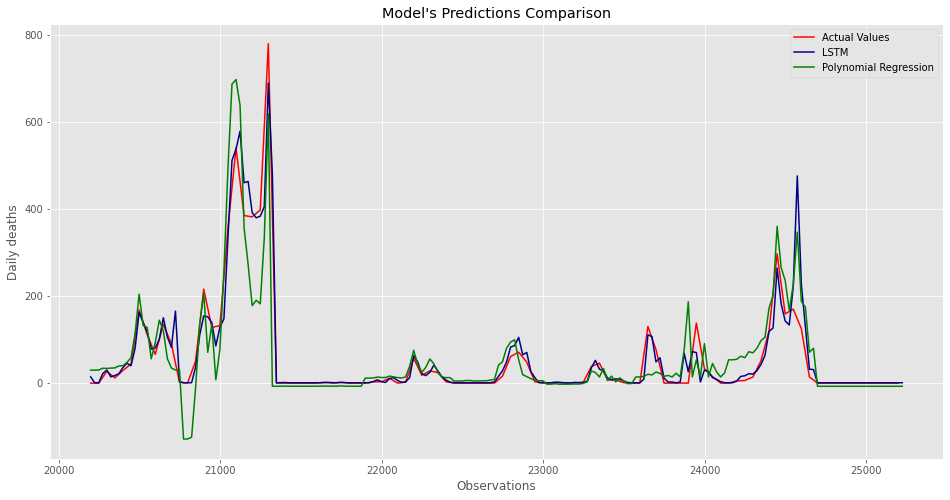

In [ ]:
# Plot actual new deaths and predictions of both models against each other

fig, ax = plt.subplots(figsize=(16, 8))
predictions['Actual'][::50].plot(ax=ax, label='Actual Values', color = "red")
predictions['DL Prediction'][::25].plot(ax=ax, label='LSTM', color = "darkblue")
predictions['ML Prediction'][::25].plot(ax=ax, label='Polynomial Regression', color = "green")
plt.title("Model's Predictions Comparison")
plt.xlabel("Observations")
plt.ylabel("Daily deaths")
ax.legend();

In [ ]:
# Print metrics summary of both models

print("Machine Learning Model Metrics - Polynomial Regression:\n")
print("Mean Absolute Error (MAE): ", mae_ml)
print("R-squared (R2): ", r2_ml)
print("Mean Squared Error (MSE):", mse_ml)
print("Root Mean Squared Error (RMSE): ", rmse_ml)
print("\n")
print("Deep Learning Model Metrics - LSTM:\n")
print("Mean Absolute Error (MAE): ", mae_dl)
print("R-squared (R2): ", r2_dl)
print("Mean Squared Error (MSE):", metrics.mean_squared_error(dl_pred, y_test_dl))
print("Root Mean Squared Error (RMSE): ", rmse_dl)

Machine Learning Model Metrics - Polynomial Regression:

Mean Absolute Error (MAE):  29.68472406736372
R-squared (R2):  0.8107386193588995
Mean Squared Error (MSE): 2709.5223763164804
Root Mean Squared Error (RMSE):  52.05307268852128


Deep Learning Model Metrics - LSTM:

Mean Absolute Error (MAE):  11.460083727944767
R-squared (R2):  0.9272531198388385
Mean Squared Error (MSE): 1054.5667685199287
Root Mean Squared Error (RMSE):  32.474093805985234
